In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
## Интегрирование функции задаваемой массивом y
def integra(y, dx):
    S = (y[0] + y[-1])/2 + y[1:-1].sum()
    return S*dx

In [4]:
## Функция маппинга
def Func(f, x, kwargs):
    return np.array(list(map(lambda x: f(x, *kwargs), x )))

In [5]:
## Исследуемы функции             _
'''
x0 - серидина графика
nu - частота
d - ширина
'''

def Cos(x, nu = 2.5, x0 = 0):
    return np.cos(nu*(x - x0))
def Exp(x, d = 1, x0 = 0):
    return np.exp(-abs(x - x0)/d)

def Sin(x, nu = 2.5, x0 = 0):
    return np.sin(nu*(x-x0))

def Rectangle(x, d = 0.5, x0 = 0): 
    if abs(x - x0) >= d:
        return 0
    else:
        return 1  
def Triangle(x, d = 0.5, x0 = 0):  
    if abs(x - x0) >= d:
        return 0
    elif x >= x0 - d and x <= x0:
        return 1 + (x - x0)/d
    elif x <= x0 + d and x >= x0:
        return  1 - (x - x0)/d
    
def Sinc(x, d = 0, x0 = 0):  ## y = sin(x)/x, if x == 0  y = 1    
    if x == 0:
        return 1
    else: return np.sin(x - x0)/(x - x0)
    
def Gauss(x, sigm = 1, x0 = 0):
    return np.exp(- ((x- x0)/(np.sqrt(2)*sigm))**2)/np.sqrt(2*np.pi*sigm**2)

In [18]:
###  N - кол- во гармоник 
### Функция для нахождения амплитуд (a_n, b_n) для N Фурье гармоник
def Fourier_coef(y, dx, l, N, x):
    A = []
    B = []
    for n in range(1, N + 1):
        A.append(integra(y*np.cos(np.pi*n*x/l), dx)/l)
        B.append(integra(y*np.sin(np.pi*n*x/l), dx)/l)
    
    a0 = integra(y, dx)/l
    
    return a0, A, B


# Функция для конкретной (n - ой) гармоники  u_n(t) = a_n cos(pi n t /l) + b_n sin(pi n t /l)
def Four_con(a_n, b_n, n, l, x):
    return  np.array(list(map(lambda x: a_n*np.cos(np.pi*n*x/l) + b_n*np.sin(np.pi*n*x/l), x)))


# Задания

## Точность рядов Фурье

1. Зафиксируйте ширину и центр графика для выше приведенных 6 функций. Постройте графики зависимости максимальной получаемой ошибки от периода. Объясните результат. Сколько Фурье гармоник надо взять чтобы ошибка была меньше $\varepsilon = 0.01$
2. Зафиксируйте период и центр графика для выше приведенных 6 функций. Постройте графики зависимости максимальной получаемой ошибки от ширины. Объясните результат. Сколько Фурье гармоник надо взять чтобы ошибка была меньше $\varepsilon = 0.01$
3. Зафиксируйте ширину и период графика для выше приведенных 6 функций. Постройте графики зависимости максимальной получаемой ошибки от центральной точки. Объясните результат. Сколько Фурье гармоник надо взять чтобы ошибка была меньше $\varepsilon = 0.01$

In [154]:
def get_max_error_T(l, func, d, center, N):
    x = np.linspace(-l, l, 100)
    y = Func(func, x, [d, center])
    dx = x[1] - x[0]
    a0, A, B = Fourier_coef(y, dx, l, N, x) # Фурье коэффициенты 
    y0 = []
    for i in range(0, N):
        y0.append(Four_con(A[i], B[i], i + 1, l, x))
    y0 =np.array(y0)
    Y = a0/2 + y0.sum(axis = 0)

    return max(abs(Y - y))

def get_max_error_d(d, func, l, center, N):
    return get_max_error_T(l, func, d, center, N)

def get_max_error_center(center, func, d, l, N):
    return get_max_error_T(l, func, d, center, N)

In [155]:
def draw_error_functions(func, N):
    l = np.linspace(0.1, 22, 50)
    d = np.linspace(0.1, 10, 50)
    x0 = np.linspace(-4, 4, 50)
    fig = plt.figure(figsize=(12,3))
    ax = fig.subplots(1, 3)
    max_errors_T_1 = Func(get_max_error_T, l, [func, 2, 0, N])
    max_errors_d_1 = Func(get_max_error_d, d, [func, 5, 0, N])
    max_errors_center_1 = Func(get_max_error_center, x0, [func, 2, 10, N])

    max_errors_T_2 = Func(get_max_error_T, l, [func, 10, 0, N])
    max_errors_d_2 = Func(get_max_error_d, d, [func, 10, 0, N])
    max_errors_center_2 = Func(get_max_error_center, x0, [func, 10, 10, N])

    ax[0].plot(l, max_errors_T_1, "k--", label = "d = 2")
    ax[0].plot(l, max_errors_T_2, "r--", label = "d = 10")
    ax[0].set_xlabel("Error function of l")
    ax[1].plot(d, max_errors_d_1, "k--", label = "l = 5")
    ax[1].plot(d, max_errors_d_2, "r--", label = "l = 10")
    ax[1].set_xlabel("Error function of d")
    ax[2].plot(x0, max_errors_center_1, "k--", label = "d = 2")
    ax[2].plot(x0, max_errors_center_2, "r--", label = "d = 10")
    ax[2].set_xlabel("Error function of center")

    ax[0].plot(l, [0.01]*50, color='green', linestyle='--', label ='')
    ax[1].plot(d, [0.01]*50, color='green', linestyle='--', label ='')
    ax[2].plot(x0, [0.01]*50, color='green', linestyle='--', label ='')

    ax[0].minorticks_on()
    ax[0].grid(True, which='both')
    ax[0].grid(which='minor', color='gray', linestyle=':')
    ax[1].minorticks_on()
    ax[1].grid(True, which='both')
    ax[1].grid(which='minor', color='gray', linestyle=':')
    ax[2].minorticks_on()
    ax[2].grid(True, which='both')
    ax[2].grid(which='minor', color='gray', linestyle=':')
    plt.legend()

#### Треугольник

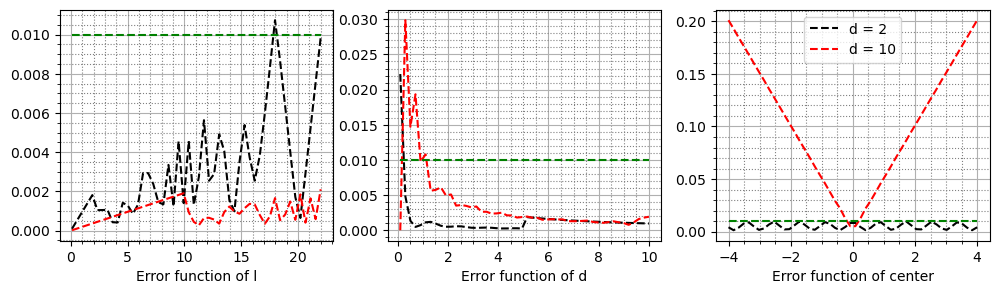

In [156]:
draw_error_functions(Triangle, 40)

##### Выводы:

Из результатов видно, ширина графика оказывает решающее значение на ошибку. Чем шире график, тем меньше ошибка. 
Также, из графика зависимости ошибки от ширины видно, что ошибка уменьшается быстрее при меньшем периоде. 

На самом графике зависомости ошибки от периода заметно, что растет и уменьшается по довольно сложному закону, однако примерно растет с увеличением периода.

При маленькой ширине графика, центральная точка практически не оказывает влияния на ошибку. Однако, если увеличить ширину видно, что минимальная ошибка будет в точке x = 0.

При N = 40 фурье гармоник удается достичь значений ошибки, меньших 0.01. Но если изменить центральную точку графика, придется взять значительно большее число гармоник.

#### Прямоугольник

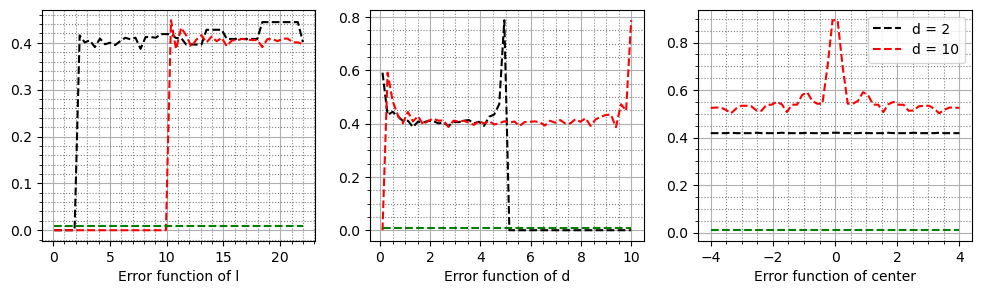

In [246]:
draw_error_functions(Rectangle, 10)

##### Выводы:
Из графиков видно, что все три параметра оказывают не очень большое влияние на изменение ошибки. Ее значения колеблются возле одного и того же числа.

При N = 200 фурье гармоник все еще не удалось достичь значений ошибки, меньших 0.01, ошибка была приблизительно равна 4. При уведичении количества гармоник до N = 1000, после продолжительных вычислений оказалось, что ошибка стала равной 20. Выбрав N = 10, я получила значительно меньшую ошибку, но все еще сильно превышающую 0.01



#### Sinc

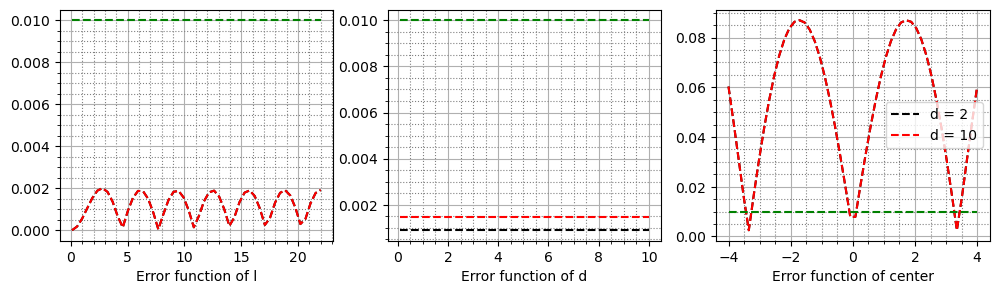

In [272]:
draw_error_functions(Sinc, 40)

##### Выводы:
Ширина функции не влияет на ошибку, период также оказывает незначительное влияние. Тогда как выбор центральной точки влияет существенно. Мне так и не удалось получить требуемую точность для ненулевых центральных точек.

При N = 60, ошибка меньше 0.01, однако только для случая, когда центральная точка нулевая.

#### Exp

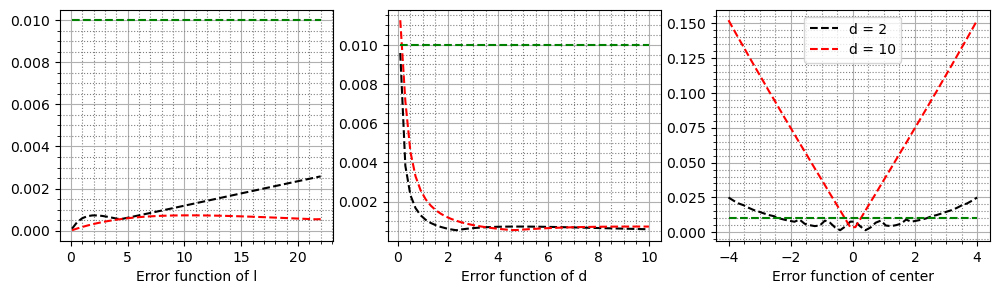

In [253]:
draw_error_functions(Exp, 40)

##### Выводы:
Ошибка уменьшается с увеличеснием ширины графика, что достаточно ожидаемо. Кроме того, ошибка медленно растет с увеличением периода. И минимальную ошибку мы наблюдаем при нулевой центральной точке. При смещении - ошибка увеличивается.

Для нулевой центральной точки, 40 фурье гармоник хватает, чтобы ошибка не превышала 0.01

#### Sin

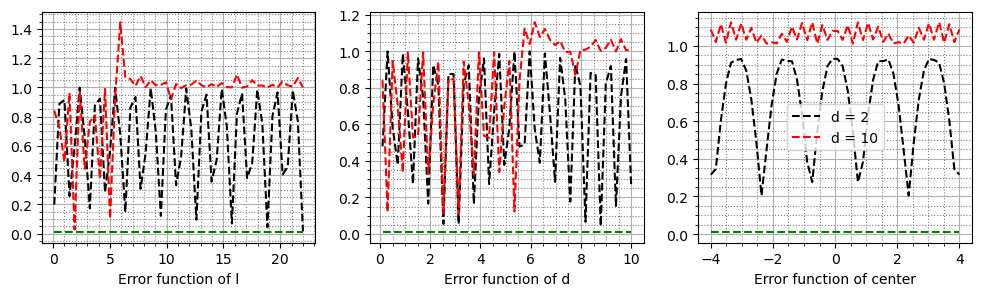

In [263]:
draw_error_functions(Sin, 80)

##### Выводы:
Ошибка колеблется возле одного значения.

В отличие от большинства графиков, для синуса при нулевой центральной точке ошибка будет максимальной, а не минимальной. Я думаю, это связано с тем, что колебания синуса будут отличаться по фазе.

При подборе не получилось подобрать такое количество фурье гармоник, которое обеспечило бы ошибку, меньшую 0.01.

При больших N, например N = 1000, ошибка была примерно равной 20.
Лучший результат, который удалось получить - ошибка примерно равная 0.6 (значения колеблются возле 0.6), при N = 40.

#### Cos

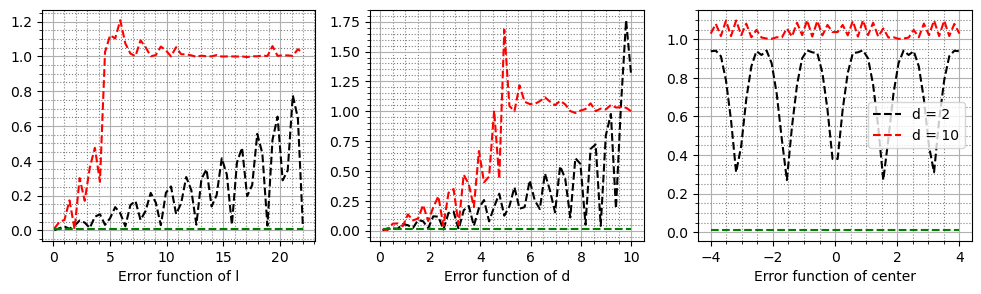

In [265]:
draw_error_functions(Cos, 15)

##### Выводы:
В целом, ошибка постепенно растет с увеличением периода или ширины, пока не достигнет значения, возле которого будет колебаться. При большей ширине, выбор центральной точки мало влияет на ошибку, при меньшей - колебания значений ошибки увеличивают свою амплитуду.

При подборе не получилось подобрать такое количество фурье гармоник, которое обеспечило бы ошибку, меньшую 0.01.

Лучший результат, который удалось получить - ошибка примерно равная 1, при N = 15.

## Свертка

$\textit{Сверткой}$ двух функций $f(x), \, g(x)$ называют функцию $h(x)$ определяемая следующим образом
\begin{equation}
    h(x) = (f * g) = \int_{-\infty}^{\infty}f(t)g(x - t) dt
\end{equation}
1. Напишите код для получения свертки двух функций, зная как брать численно интеграл.
2. Нарисуйте графики свертки выше приведенных функций с функцией $g(x) = Rectangle_{\, 0.5, \, 0}$
3. Нарисуйте графики свертки выше приведенных функций с функцией $g(x) = Gauss_{\,1,\, 0}$

In [13]:
def integra_for_convolution(x, f, f_kwards, g, g_kwards):
    t = np.linspace(-10, 10, 2000)
    dt = t[1] - t[0]
    S = (convolution_func(t[0],f, f_kwards, g, g_kwards, x) + convolution_func(t[-1], f, f_kwards, g, g_kwards, x))/2 + Func(convolution_func, t, [f, f_kwards, g, g_kwards, x]).sum()
    return S*dt

def convolution_func(t, f, f_kwards, g, g_kwards, x):
    return f(t, *f_kwards)*g(x-t, *g_kwards)

Свертка с функцией $g(x) = Rectangle_{\, 0.5, \, 0}$

Text(0.5, 1.0, 'Cos')

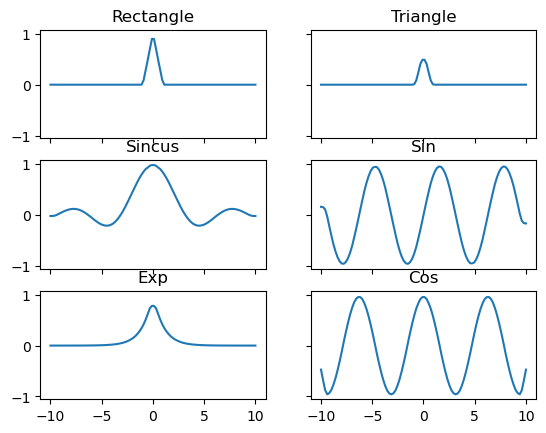

In [14]:
x = np.linspace(-10, 10, 100)
fig, (ax1, ax2, ax3) =  plt.subplots(nrows = 3, ncols = 2, sharex = True, sharey = True)
ax1[0].plot(x, Func(integra_for_convolution, x, [Rectangle, [0.5, 0],  Rectangle, [0.5, 0]]))
ax1[1].plot(x, Func(integra_for_convolution, x, [Triangle, [0.5, 0],  Rectangle, [0.5, 0]]))
ax2[0].plot(x, Func(integra_for_convolution, x, [Sinc, [1, 0],  Rectangle, [0.5, 0]]))
ax2[1].plot(x, Func(integra_for_convolution, x, [Sin, [1, 0],  Rectangle, [0.5, 0]]))
ax3[0].plot(x, Func(integra_for_convolution, x, [Exp, [1, 0],  Rectangle, [0.5, 0]]))
ax3[1].plot(x, Func(integra_for_convolution, x, [Cos, [1, 0],  Rectangle, [0.5, 0]]))

ax1[0].set_title("Rectangle")
ax1[1].set_title("Triangle")
ax2[0].set_title("Sincus")
ax2[1].set_title("Sin")
ax3[0].set_title("Exp")
ax3[1].set_title("Cos")


Свертка функцией $g(x) = Gauss_{\,1,\, 0}$

Text(0.5, 1.0, 'Cos')

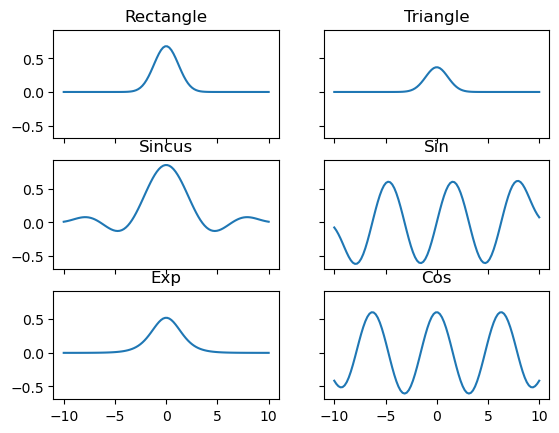

In [15]:
fig, (ax1, ax2, ax3) =  plt.subplots(nrows = 3, ncols = 2, sharex = True, sharey = True)
ax1[0].plot(x, Func(integra_for_convolution, x, [Rectangle, [1, 0], Gauss, [1, 0]]))
ax1[1].plot(x, Func(integra_for_convolution, x, [Triangle, [1, 0], Gauss, [1, 0]]))
ax2[0].plot(x, Func(integra_for_convolution, x, [Sinc, [1, 0], Gauss, [1, 0]]))
ax2[1].plot(x, Func(integra_for_convolution, x, [Sin, [1, 0], Gauss, [1, 0]]))
ax3[0].plot(x, Func(integra_for_convolution, x, [Exp, [1, 0], Gauss, [1, 0]]))
ax3[1].plot(x, Func(integra_for_convolution, x, [Cos, [1, 0], Gauss, [1, 0]]))

ax1[0].set_title("Rectangle")
ax1[1].set_title("Triangle")
ax2[0].set_title("Sincus")
ax2[1].set_title("Sin")
ax3[0].set_title("Exp")
ax3[1].set_title("Cos")


## Гауссова функция с узкой шириной

1. Рассмотрите узкую гауссову функцию с очень узкой шириной $sigm = 0.001$. Сколько фурье гармоник надо взять для точности $\varepsilon = 0.01$. Постройте графики фурье коэффициентов в зависимости от частот ($\textbf{plt.stem(x, y)}$).
2. Найдите фурье коэффициенты для сверток выше приведенных функций с функцией Гаусса ($g(t) = Gauss_{\, 0.001, \, 0}$). Постройте графики. Сравните с графиками фурье коэффициентов самих функций. Объясните результат.


In [17]:
def get_error_function(l, func, d, center, N):
    x = np.linspace(-l, l, 100)
    y = Func(func, x, [d, center])
    dx = x[1] - x[0]
    a0, A, B = Fourier_coef(y, dx, l, N, x) # Фурье коэффициенты 
    y0 = []
    for i in range(0, N):
        y0.append(Four_con(A[i], B[i], i + 1, l, x))
    y0 =np.array(y0)
    Y = a0/2 + y0.sum(axis = 0)

    return abs(Y - y)

def draw_error_function(func, sigm, x0, N):
    l = np.linspace(0.1, 22, 50)
    max_errors_T_1 = Func(get_max_error_T, l, [func, sigm, x0, N])

    plt.plot(l, max_errors_T_1, "k--")
    
    plt.plot(l, [0.01]*50, color='green', linestyle='--', label ='')

    plt.minorticks_on()
    plt.grid(True, which='both')
    plt.grid(which='minor', color='gray', linestyle=':')

Функция ошибки в зависимости от периода для функции гаусса с шириной 0.001 и центральной точкой 0. Как видно из графика, 40 фурье гармоник как раз хватает для точности 0.01

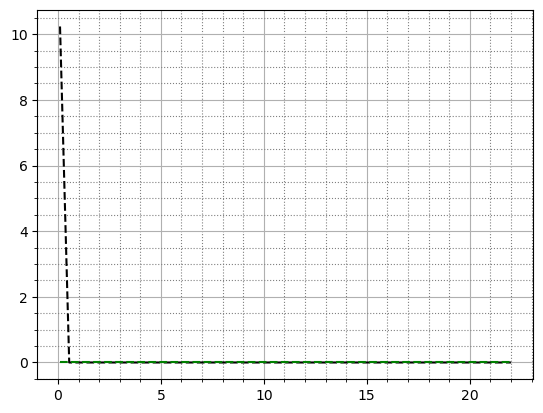

In [166]:
draw_error_function(Gauss, 0.001, 0, 40)

Text(0.5, 1.0, 'b_n')

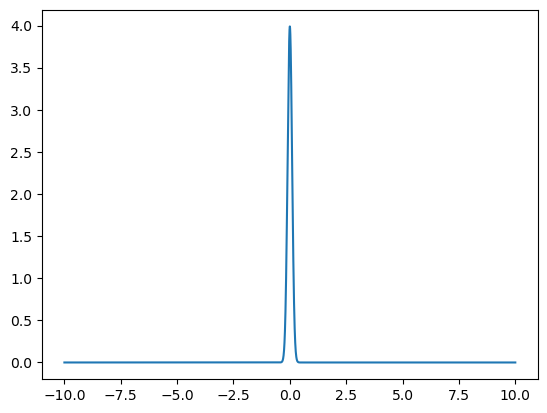

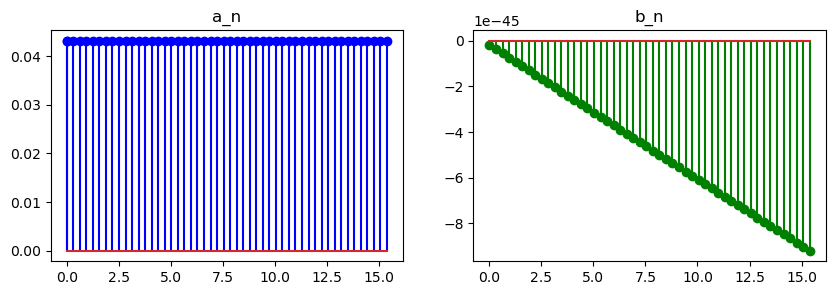

In [33]:
def draw_fourier_coeff_w(func,x, l, N):
    t = x[1] - x[0]
    w_g = 2*np.pi/t
    dw = w_g/N
    def w_j(j):
        if (0 <= j <= N/2):
            return j*dw
        else:
            return j*dw - w_g

    w = []
    for i in range(N):
        w.append(w_j(i))
    w = np.array(w) 
    dx = x[1] - x[0]
    a0, A, B = Fourier_coef(func, dx, l, N, x) # Фурье коэффициенты 
    return a0, A, B, w

x = np.linspace(-10, 10, 5000)
#a0, A, B, w = draw_fourier_coeff_w(Func(Gauss, x, [ 1, 0]),x, 10, 50)
l = 10
N = 50
plt.plot(x, Func(Gauss, x, [0.1, 0]))
a0, A, B = Fourier_coef(Func(Gauss, x, [0.001, 0]), x[1] - x[0], l, N, x) # Фурье коэффициенты 
fig = plt.figure(figsize=(10,3))
ax = fig.subplots(1, 2)
w = []
for i in range(len(A)):
    w.append(np.pi*i/l)
w = np.array(w)
ax[0].stem(w[0], a0, 'b')
ax[0].stem(w, A, 'b')
ax[1].stem(w, B, 'g')
ax[0].set_title("a_n")
ax[1].set_title("b_n")

Фурье коэффициенты для сверток выше приведенных функций с функцией Гаусса ($g(t) = Gauss_{\, 0.001, \, 0}$) и графики фурье коэффициентов самих функций.

Text(0.5, 1.0, 'b_n')

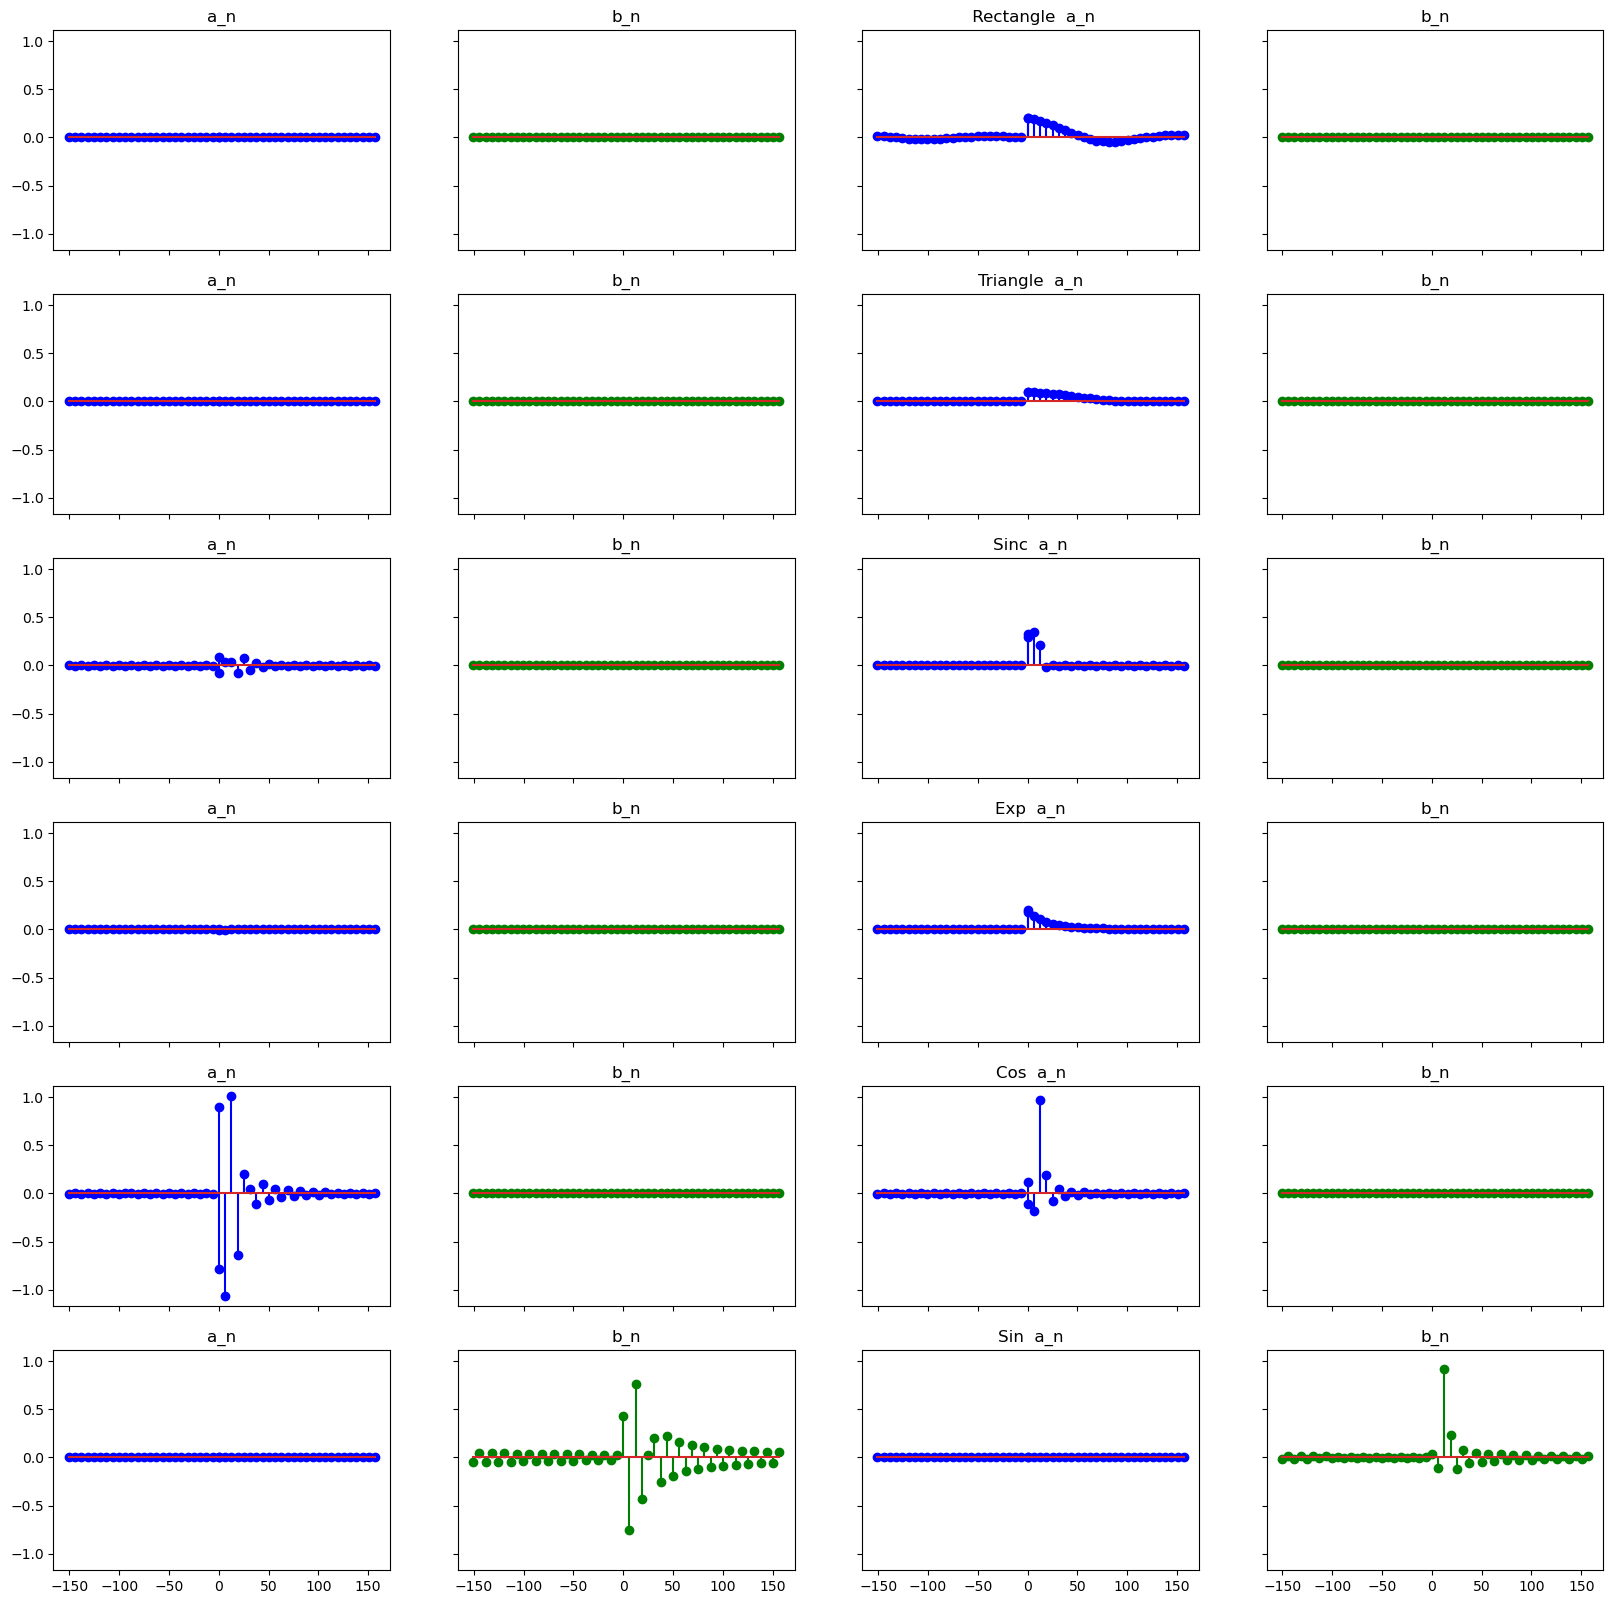

In [35]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) =  plt.subplots(nrows = 6, ncols = 4, sharex = True, sharey = True)
fig.set_figwidth(20)
fig.set_figheight(20)
x = np.linspace(-10, 10, 1000)
a0, A, B, w = draw_fourier_coeff_w(Func(integra_for_convolution, x, [Rectangle, [1, 0], Gauss, [0.001, 0]]), x, 10, 50)
ax1[0].stem(w[0], a0, 'b')
ax1[0].stem(w, A, 'b')
ax1[1].stem(w, B, 'g')
ax1[0].set_title("a_n")
ax1[1].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(Func(Rectangle, x, [1, 0]), x, 10, 50)
ax1[2].stem(w[0], a0, 'b')
ax1[2].stem(w, A, 'b')
ax1[3].stem(w, B, 'g')
ax1[2].set_title(" Rectangle  a_n")
ax1[3].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(Func(integra_for_convolution, x, [Triangle, [1, 0], Gauss, [0.001, 0]]), x, 10, 50)
ax2[0].stem(w[0], a0, 'b')
ax2[0].stem(w, A, 'b')
ax2[1].stem(w, B, 'g')
ax2[0].set_title("a_n")
ax2[1].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(Func(Triangle, x, [1, 0]), x, 10, 50)
ax2[2].stem(w[0], a0, 'b')
ax2[2].stem(w, A, 'b')
ax2[3].stem(w, B, 'g')
ax2[2].set_title("Triangle  a_n")
ax2[3].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(Func(integra_for_convolution, x, [Sinc, [1, 0], Gauss, [0.001, 0]]), x, 10, 50)
ax3[0].stem(w[0], a0, 'b')
ax3[0].stem(w, A, 'b')
ax3[1].stem(w, B, 'g')
ax3[0].set_title("a_n")
ax3[1].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(Func(Sinc, x, [1, 0]), x, 10, 50)
ax3[2].stem(w[0], a0, 'b')
ax3[2].stem(w, A, 'b')
ax3[3].stem(w, B, 'g')
ax3[2].set_title("Sinc  a_n")
ax3[3].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(Func(integra_for_convolution, x, [Exp, [1, 0], Gauss, [0.001, 0]]), x, 10, 50)
ax4[0].stem(w[0], a0, 'b')
ax4[0].stem(w, A, 'b')
ax4[1].stem(w, B, 'g')
ax4[0].set_title("a_n")
ax4[1].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(Func(Exp, x, [1, 0]), x, 10, 50)
ax4[2].stem(w[0], a0, 'b')
ax4[2].stem(w, A, 'b')
ax4[3].stem(w, B, 'g')
ax4[2].set_title("Exp  a_n")
ax4[3].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(Func(integra_for_convolution, x, [Cos, [1, 0], Gauss, [0.001, 0]]), x, 10, 50)
ax5[0].stem(w[0], a0, 'b')
ax5[0].stem(w, A, 'b')
ax5[1].stem(w, B, 'g')
ax5[0].set_title("a_n")
ax5[1].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(Func(Cos, x, [1, 0]), x, 10, 50)
ax5[2].stem(w[0], a0, 'b')
ax5[2].stem(w, A, 'b')
ax5[3].stem(w, B, 'g')
ax5[2].set_title("Cos  a_n")
ax5[3].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(Func(integra_for_convolution, x, [Sin, [1, 0], Gauss, [0.001, 0]]), x, 10, 50)
ax6[0].stem(w[0], a0, 'b')
ax6[0].stem(w, A, 'b')
ax6[1].stem(w, B, 'g')
ax6[0].set_title("a_n")
ax6[1].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(Func(Sin, x, [1, 0]), x, 10, 50)
ax6[2].stem(w[0], a0, 'b')
ax6[2].stem(w, A, 'b')
ax6[3].stem(w, B, 'g')
ax6[2].set_title("Sin  a_n")
ax6[3].set_title("b_n")

## Умножение функций
Функции $\textbf{Gauss}$ и $\textbf{Rectangle}$ можно рассматривать как оконные функции.
1. Для остальных функций получите графики функций, умноженых на данные оконные функции.
2. Найдите фурье коэффициенты полученных функций. Постройте их графики.

In [210]:
def multiply_functions(x, f, f_kwards, g, g_kwards):
    a = np.array(Func(f, x, f_kwards))
    b = np.array(Func(g, x, g_kwards))
    return a*b

Умножение на функцию Gauss

Text(0.5, 1.0, 'Cos')

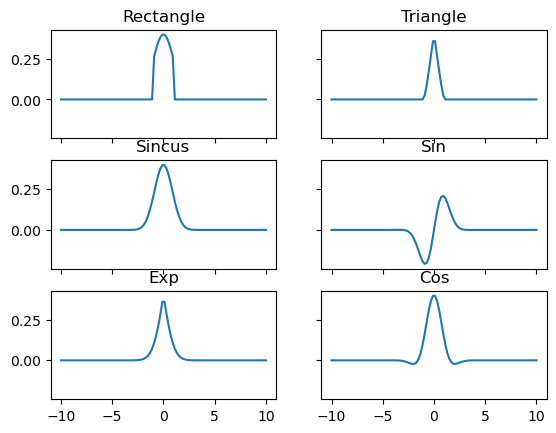

In [211]:
fig, (ax1, ax2, ax3) =  plt.subplots(nrows = 3, ncols = 2, sharex = True, sharey = True)
ax1[0].plot(x, multiply_functions(x, Rectangle, [1, 0], Gauss, [1, 0]))
ax1[1].plot(x, multiply_functions(x, Triangle, [1, 0], Gauss, [1, 0]))
ax2[0].plot(x, multiply_functions(x, Sinc, [1, 0], Gauss, [1, 0]))
ax2[1].plot(x, multiply_functions(x, Sin, [1, 0], Gauss, [1, 0]))
ax3[0].plot(x, multiply_functions(x, Exp, [1, 0], Gauss, [1, 0]))
ax3[1].plot(x, multiply_functions(x, Cos, [1, 0], Gauss, [1, 0]))

ax1[0].set_title("Rectangle")
ax1[1].set_title("Triangle")
ax2[0].set_title("Sincus")
ax2[1].set_title("Sin")
ax3[0].set_title("Exp")
ax3[1].set_title("Cos")

Фурье коэффициенты умноженных на функцию Gauss функций

Text(0.5, 1.0, 'b_n')

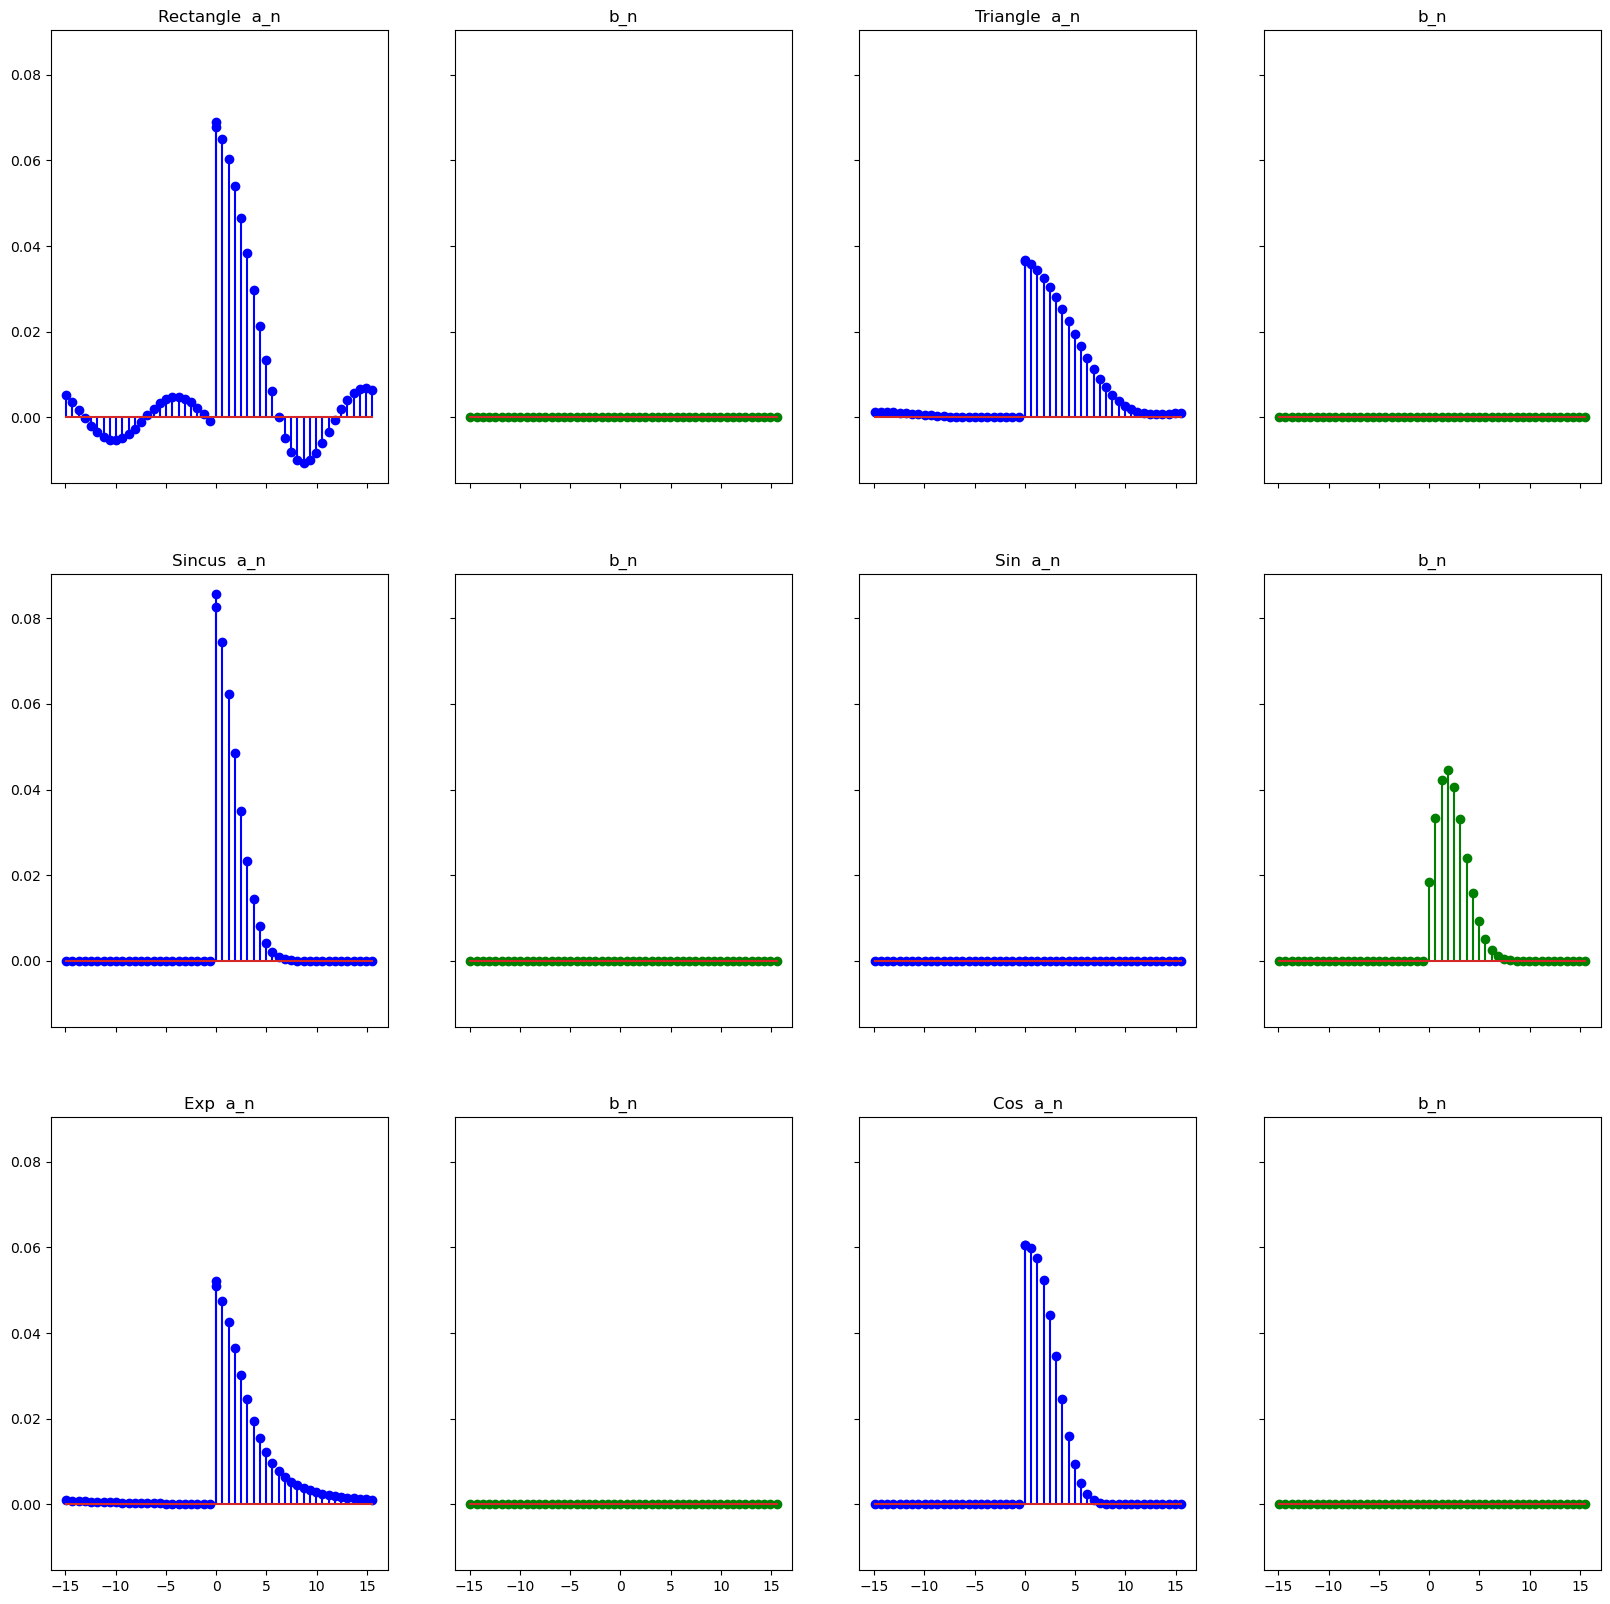

In [229]:
x = np.linspace(-10, 10, 100)
fig, (ax1, ax2, ax3) =  plt.subplots(nrows = 3, ncols = 4, sharex = True, sharey = True)
fig.set_figwidth(20)
fig.set_figheight(20)

a0, A, B, w = draw_fourier_coeff_w(multiply_functions(x, Rectangle, [1, 0], Gauss, [1, 0]), x, 10, 50)
ax1[0].stem(w[0], a0, 'b')
ax1[0].stem(w, A, 'b')
ax1[1].stem(w, B, 'g')
ax1[0].set_title("Rectangle  a_n")
ax1[1].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(multiply_functions(x, Triangle, [1, 0], Gauss, [1, 0]), x, 10, 50)
ax1[2].stem(w[0], a0, 'b')
ax1[2].stem(w, A, 'b')
ax1[3].stem(w, B, 'g')
ax1[2].set_title("Triangle  a_n")
ax1[3].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(multiply_functions(x, Sinc, [1, 0], Gauss, [1, 0]), x, 10, 50)
ax2[0].stem(w[0], a0, 'b')
ax2[0].stem(w, A, 'b')
ax2[1].stem(w, B, 'g')
ax2[0].set_title("Sincus  a_n")
ax2[1].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(multiply_functions(x, Sin, [1, 0], Gauss, [1, 0]), x, 10, 50)
ax2[2].stem(w[0], a0, 'b')
ax2[2].stem(w, A, 'b')
ax2[3].stem(w, B, 'g')
ax2[2].set_title("Sin  a_n")
ax2[3].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(multiply_functions(x, Exp, [1, 0], Gauss, [1, 0]), x, 10, 50)
ax3[0].stem(w[0], a0, 'b')
ax3[0].stem(w, A, 'b')
ax3[1].stem(w, B, 'g')
ax3[0].set_title("Exp  a_n")
ax3[1].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(multiply_functions(x, Cos, [1, 0], Gauss, [1, 0]), x, 10, 50)
ax3[2].stem(w[0], a0, 'b')
ax3[2].stem(w, A, 'b')
ax3[3].stem(w, B, 'g')
ax3[2].set_title("Cos  a_n")
ax3[3].set_title("b_n")

Умножение на функцию Rectangle

Text(0.5, 1.0, 'Cos')

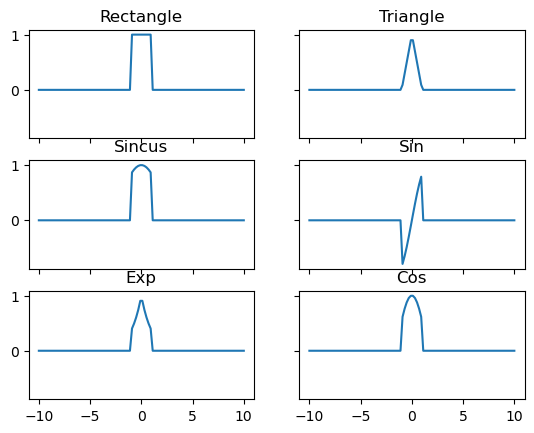

In [225]:
fig, (ax1, ax2, ax3) =  plt.subplots(nrows = 3, ncols = 2, sharex = True, sharey = True)
ax1[0].plot(x, multiply_functions(x, Rectangle, [1, 0], Rectangle, [1, 0]))
ax1[1].plot(x, multiply_functions(x, Triangle, [1, 0], Rectangle, [1, 0]))
ax2[0].plot(x, multiply_functions(x, Sinc, [1, 0], Rectangle, [1, 0]))
ax2[1].plot(x, multiply_functions(x, Sin, [1, 0], Rectangle, [1, 0]))
ax3[0].plot(x, multiply_functions(x, Exp, [1, 0], Rectangle, [1, 0]))
ax3[1].plot(x, multiply_functions(x, Cos, [1, 0], Rectangle, [1, 0]))

ax1[0].set_title("Rectangle")
ax1[1].set_title("Triangle")
ax2[0].set_title("Sincus")
ax2[1].set_title("Sin")
ax3[0].set_title("Exp")
ax3[1].set_title("Cos")

Фурье коэффициенты умноженных на функцию Rectangle функций

Text(0.5, 1.0, 'b_n')

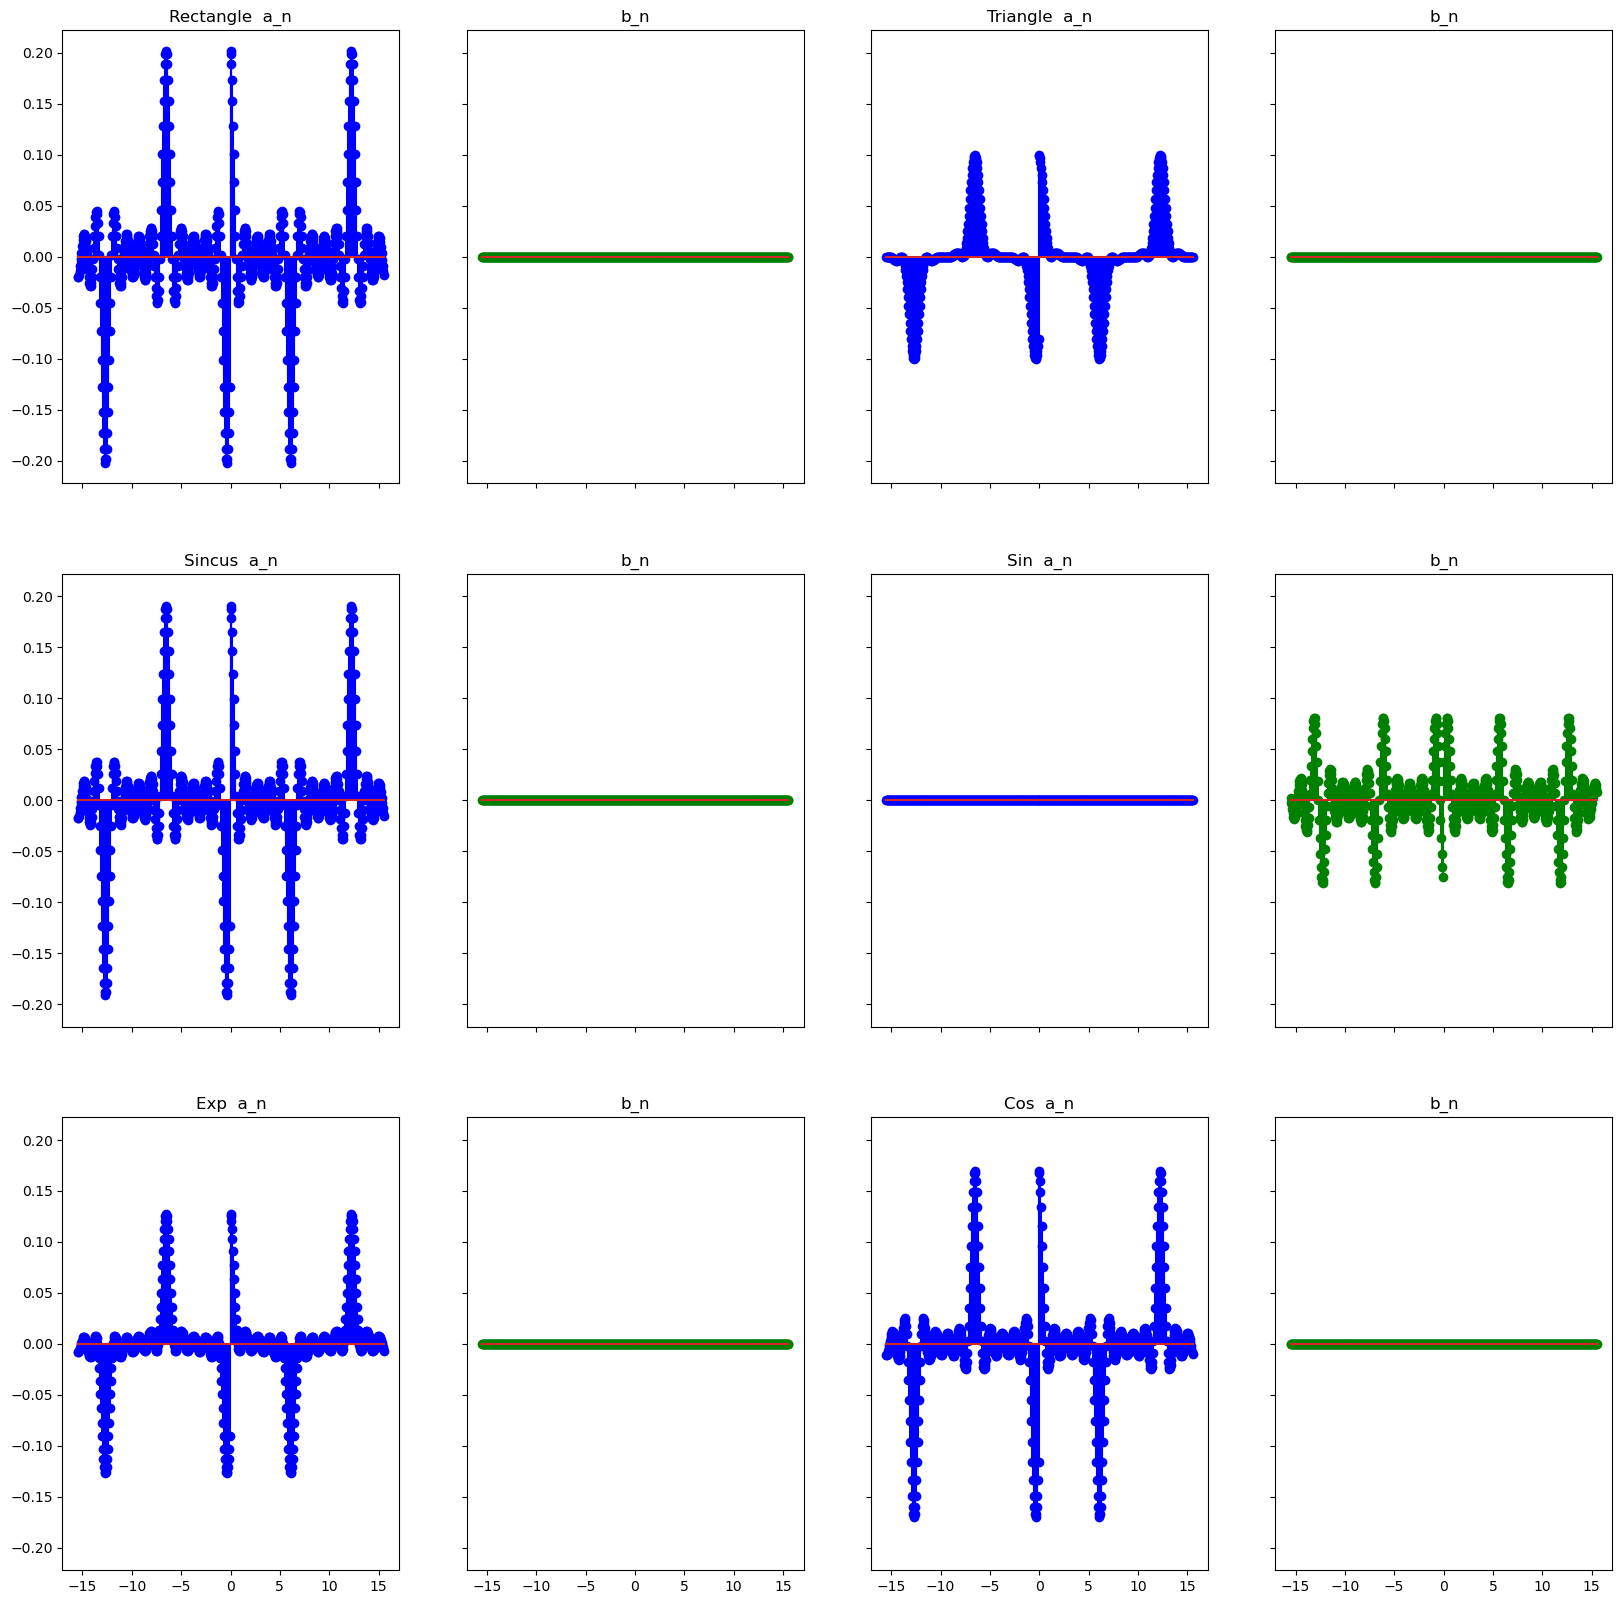

In [226]:
x = np.linspace(-10, 10, 100)
fig, (ax1, ax2, ax3) =  plt.subplots(nrows = 3, ncols = 4, sharex = True, sharey = True)
fig.set_figwidth(20)
fig.set_figheight(20)

a0, A, B, w = draw_fourier_coeff_w(multiply_functions(x, Rectangle, [1, 0], Rectangle, [1, 0]), x, 10, 500)
ax1[0].stem(w[0], a0, 'b')
ax1[0].stem(w, A, 'b')
ax1[1].stem(w, B, 'g')
ax1[0].set_title("Rectangle  a_n")
ax1[1].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(multiply_functions(x, Triangle, [1, 0], Rectangle, [1, 0]), x, 10, 500)
ax1[2].stem(w[0], a0, 'b')
ax1[2].stem(w, A, 'b')
ax1[3].stem(w, B, 'g')
ax1[2].set_title("Triangle  a_n")
ax1[3].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(multiply_functions(x, Sinc, [1, 0], Rectangle, [1, 0]), x, 10, 500)
ax2[0].stem(w[0], a0, 'b')
ax2[0].stem(w, A, 'b')
ax2[1].stem(w, B, 'g')
ax2[0].set_title("Sincus  a_n")
ax2[1].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(multiply_functions(x, Sin, [1, 0], Rectangle, [1, 0]), x, 10, 500)
ax2[2].stem(w[0], a0, 'b')
ax2[2].stem(w, A, 'b')
ax2[3].stem(w, B, 'g')
ax2[2].set_title("Sin  a_n")
ax2[3].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(multiply_functions(x, Exp, [1, 0], Rectangle, [1, 0]), x, 10, 500)
ax3[0].stem(w[0], a0, 'b')
ax3[0].stem(w, A, 'b')
ax3[1].stem(w, B, 'g')
ax3[0].set_title("Exp  a_n")
ax3[1].set_title("b_n")

a0, A, B, w = draw_fourier_coeff_w(multiply_functions(x, Cos, [1, 0], Rectangle, [1, 0]), x, 10, 500)
ax3[2].stem(w[0], a0, 'b')
ax3[2].stem(w, A, 'b')
ax3[3].stem(w, B, 'g')
ax3[2].set_title("Cos  a_n")
ax3[3].set_title("b_n")